In [44]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import  BaggingClassifier, ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
df=pd.read_csv('Youtube.csv')
df.head()



,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [46]:
filtered_data = df[df['CLASS'] == 1]
print(filtered_data.head())

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  


In [47]:
filtered_data = df[df['CLASS'] == 0]
print(filtered_data.head())

                               COMMENT_ID         AUTHOR                 DATE  \
7   z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k   Bob Kanowski  2013-11-28T12:33:27   
16    z13bgdvyluihfv11i22rgxwhuvabzz1os04    Zielimeek21  2013-11-28T21:49:00   
20    z12axnji5w2axxht522thb3bktvqjdlbp04   zhichao wang  2013-11-29T02:13:56   
23  z12ntlcqht2bvjewi04cf1up0xjvs5lq3mc0k       Owen Lai  2013-12-01T04:51:52   
28  z13tj514otzlurfbc04ccjwhrnmej1iihqw0k  Brandon Pryor  2014-01-19T00:36:25   

                                              CONTENT  CLASS  
7   i turned it on mute as soon is i came on i jus...      0  
16                       I'm only checking the views﻿      0  
20  i think about 100 millions of the views come f...      0  
23                           just checking the views﻿      0  
28  I dont even watch it anymore i just come here ...      0  


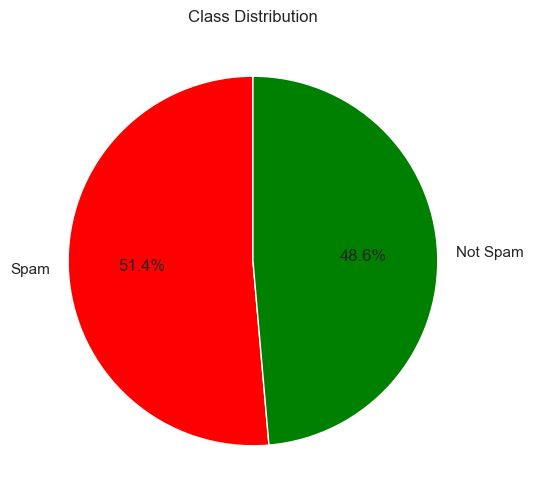

In [48]:
df['class_label'] = df['CLASS'].map({1: 'Spam', 0: 'Not Spam'})

# Count the occurrences of each class
class_counts = df['class_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Class Distribution')
plt.show()

In [49]:
comments = df['CONTENT']
labels = df['CLASS'].values

In [50]:
pd.Series(labels).value_counts()

1    1005
0     951
Name: count, dtype: int64

In [51]:
comments = comments.apply(lambda x: x.lower())

In [52]:
def replace_url(text, replacement):
    text = str(text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    text = re.sub('[/]?watch(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    
    return text

# Replace url to http
comments = comments.apply(lambda x: replace_url(x, 'http'))

In [53]:
def remove_encoding(text):
    text = str(text)
    text = text.replace('\ufeff', '')
    return text

# Remove encoding
comments = comments.apply(lambda x: remove_encoding(x))

In [54]:
# tokenize all comments in the data
comments_token = comments.apply(lambda x: x.split())

In [55]:
print('Average word length of comments is {0:.0f}.'.format(np.mean(comments_token.apply(lambda x: len(x)))))
print('Max word length of comments is {0:.0f}.'.format(np.max(comments_token.apply(lambda x: len(x)))))
print('Min word length of comments is {0:.0f}.'.format(np.min(comments_token.apply(lambda x: len(x)))))

Average word length of comments is 16.
Max word length of comments is 213.
Min word length of comments is 1.


In [56]:
stop_words = set(stopwords.words('english')) 

comments_rsw = []
for comment_token in comments_token:
    filtered_comment = [w for w in comment_token if not w in stop_words] 
    comments_rsw.append(filtered_comment)
#print(comments_rsw)

In [57]:
def lemmatization(dataset):
    lemma = nltk.WordNetLemmatizer()
    comments_lemma = []
    for comment in comments_rsw:
        comment_lemma = [lemma.lemmatize(w) for w in comment]
        comments_lemma.append(comment_lemma)
    return comments_lemma

# Words lemmatization
comments_lemma = lemmatization(comments_rsw)
#print(comments_lemma)
#print(labels)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(comments_lemma, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=0, 
                                                    stratify=labels)

In [59]:
# Create bag of words
from joblib import dump, load

X_train_untokenized = []

for comment in X_train:
    text = ' '.join(comment)
    X_train_untokenized.append(text)
    
vect = CountVectorizer(min_df=3)
vect.fit(X_train_untokenized)


X_test_untokenized = []

for comment in X_test:
    text = ' '.join(comment)
    X_test_untokenized.append(text)

X_train = vect.transform(X_train_untokenized).toarray()
X_test = vect.transform(X_test_untokenized).toarray()



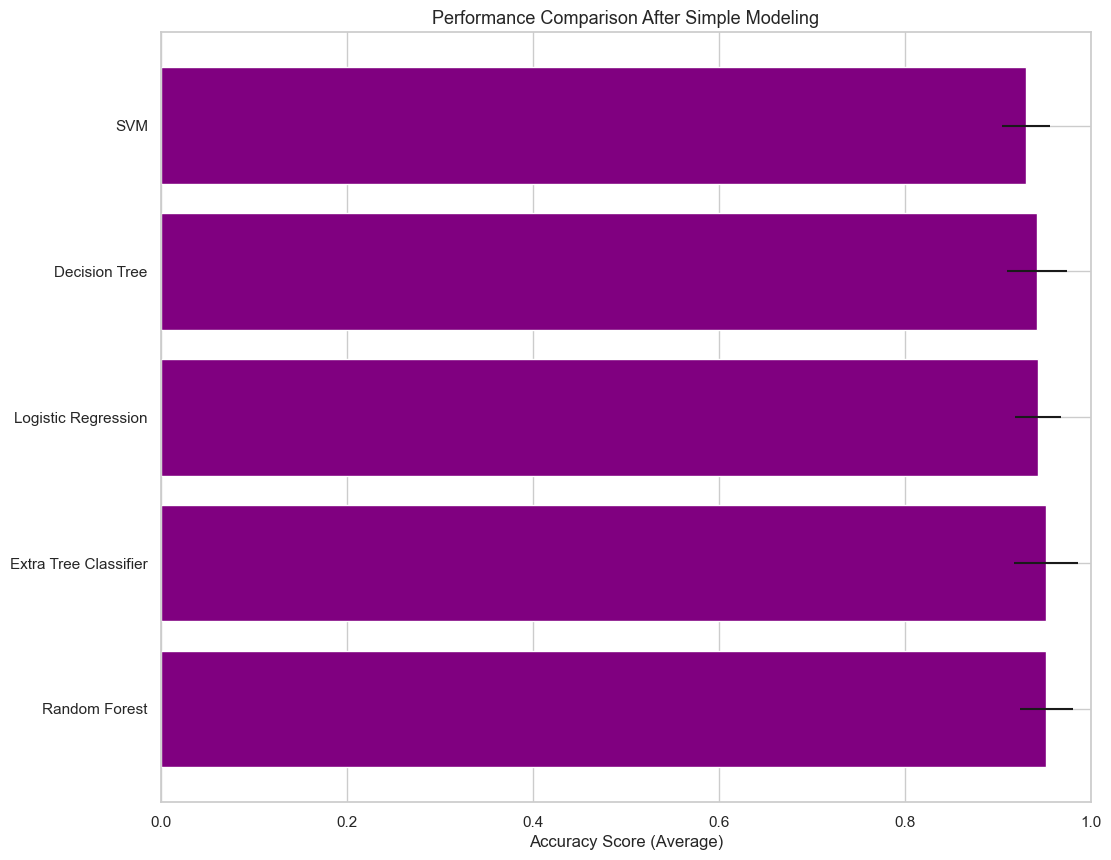

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

estimators = [
    ('Decision Tree', DecisionTreeClassifier),
    ('Logistic Regression', LogisticRegression),
    ('Random Forest', RandomForestClassifier),
    ('SVM', SVC),
    ('Extra Tree Classifier', ExtraTreesClassifier)
]

comparison_cols = ['Algorithm', 'Training Time (Avg)', 'Accuracy (Avg)', 'Accuracy (3xSTD)']
comparison_df = pd.DataFrame(columns=comparison_cols)

cv_split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

for idx, (name, estimator) in enumerate(estimators):
    cv_results = cross_validate(estimator(), X_train, y_train, cv=cv_split)
    
    comparison_df.loc[idx, 'Algorithm'] = name
    comparison_df.loc[idx, 'Training Time (Avg)'] = cv_results['fit_time'].mean()
    comparison_df.loc[idx, 'Accuracy (Avg)'] = cv_results['test_score'].mean()
    comparison_df.loc[idx, 'Accuracy (3xSTD)'] = cv_results['test_score'].std() * 3

comparison_df.set_index(keys='Algorithm', inplace=True)
comparison_df.sort_values(by='Accuracy (Avg)', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))

y_pos = np.arange(len(comparison_df))
ax.barh(y_pos, comparison_df['Accuracy (Avg)'], xerr=comparison_df['Accuracy (3xSTD)'], color='purple')
ax.set_yticks(y_pos)
ax.set_yticklabels(comparison_df.index)
ax.set_xlabel('Accuracy Score (Average)')
ax.set_title('Performance Comparison After Simple Modeling', size=13)
ax.set_xlim(0, 1)

plt.show()


In [61]:
from sklearn.metrics import accuracy_score
from joblib import dump, load

clf = ExtraTreesClassifier(criterion = 'gini',
                           n_estimators = 100,
                       random_state = 0)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('The accuracy of the model based on the test set: {}'.format(accuracy_score(y_test, predictions)))

The accuracy of the model based on the test set: 0.9413265306122449


In [62]:
from joblib import dump, load

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Save both the model and the vectorizer
dump((model, vect), 'ExtraTreesClassifier.pkl')

['ExtraTreesClassifier.pkl']

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       191
           1       0.94      0.93      0.94       201

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       191
           1       0.94      0.90      0.92       201

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       191
           1       0.95      0.94      0.94       201

    accuracy                           0.94       392

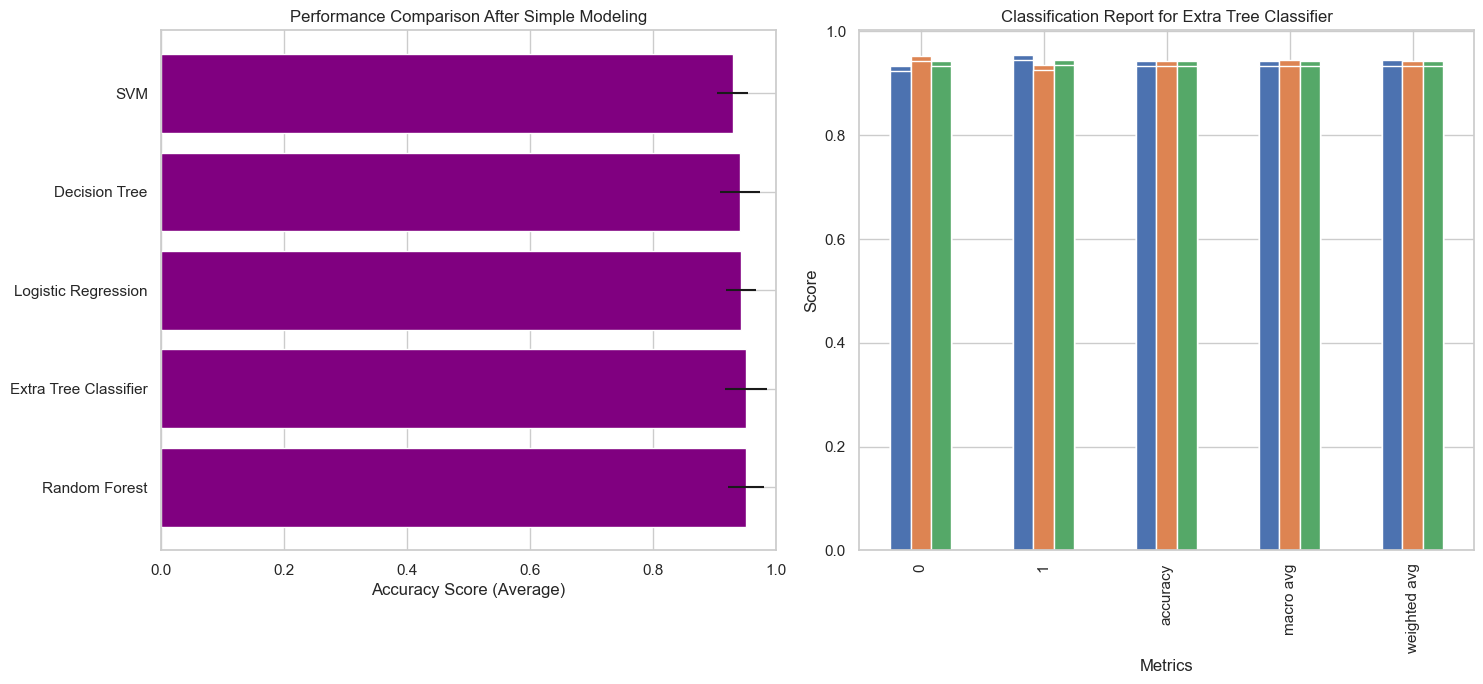

In [63]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Plotting the Performance Graph
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Performance comparison plot
y_pos = range(len(comparison_df))
axes[0].barh(y_pos, comparison_df['Accuracy (Avg)'], xerr=comparison_df['Accuracy (3xSTD)'], color='purple')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(comparison_df.index)
axes[0].set_xlabel('Accuracy Score (Average)')
axes[0].set_title('Performance Comparison After Simple Modeling')
axes[0].set_xlim(0, 1)

# Generating and displaying classification reports
for idx, (name, estimator) in enumerate(estimators):
    clf = estimator()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Display classification report in the second subplot
    df_report = pd.DataFrame(report).transpose()
    df_report.drop(columns=['support'], inplace=True)
    df_report.plot(kind='bar', ax=axes[1], legend=False)
    axes[1].set_title('Classification Report')
    axes[1].set_xlabel('Metrics')
    axes[1].set_ylabel('Score')
    axes[1].set_title(f'Classification Report for {name}')

plt.tight_layout()
plt.show()
